In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# 1) Problema de los 3 cuerpos.

## a) Soluición de las ecuaciones diferenciales utilizando Runge Kutta.

In [2]:
# Definición de parámetros del problema de los tres cuerpos.
m = 1.
a = 0.24250109
b = -0.0607718825
c = 0.93240727
d = 0.86473146

r1_0 = np.array([a,b])
r2_0 = np.array([-a,-b])
r3_0 = np.array([0.,0.])
v1_0 = np.array([c,d])
v2_0 = np.array([c,d])
v3_0 = np.array([-2*c,-2*d])

# Función que retorna la norma de un array de dos componentes padaso por parámetro.
def norm(r):
    return np.sqrt(r[0]**2 + r[1]**2)

# Función que devuelve la derivada del vector usado para el problema de los 3 cuerpos.
# Se parte de un un vector Y que tiene 12 componentes, las posiciones x y y de cada planeta y sus repectivas 
# velocidades en x y y, poniendo primero las posiciones y luego las velocidades.
def f(Y):
    r1 = np.array([Y[0],Y[1]]) # Vectores posición de cada planeta.
    r2 = np.array([Y[2],Y[3]])
    r3 = np.array([Y[4],Y[5]])
    r12 = r2 - r1              # Vectores de posiciones relativas entre los planetas. 
    r13 = r3 - r1
    r23 = r3 - r2
    norm_r12 = norm(r12)       # Normas de los vectores de posiciones relativas.
    norm_r13 = norm(r13)
    norm_r23 = norm(r23)
    return np.array([Y[6], Y[7], Y[8], Y[9], Y[10], Y[11],
                      m*r12[0]/(norm_r12**3) + m*r13[0]/(norm_r13**3),  # Se calculan las fuerzas componente 
                      m*r12[1]/(norm_r12**3) + m*r13[1]/(norm_r13**3),  # a componente para cada uno de los 
                     -m*r12[0]/(norm_r12**3) + m*r23[0]/(norm_r23**3),  # planetas teniendo en cuenta la ley
                     -m*r12[1]/(norm_r12**3) + m*r23[1]/(norm_r23**3),  # de gravitación universal y se retornan
                     -m*r13[0]/(norm_r13**3) - m*r23[0]/(norm_r23**3),  # apropiadamente.
                     -m*r13[1]/(norm_r13**3) - m*r23[1]/(norm_r23**3)]) 

# Método Runge Kutta dado por el profesor en el cuaderno 10-ODE.ipynb.
def one_Kutta4_step():
    global t
    global Deltat
    global Y
    K1 = f(Y)
    K2 = f(Y + Deltat*(1./2.*K1))
    K3 = f(Y + Deltat*(1./2.*K2))
    K4 = f(Y + Deltat*K3)
    Y+= Deltat * (1./6.*K1 + 1./3.*K2 + 1./3.*K3 + 1./6.*K4)
    t+= float(format(Deltat, '.5f'))
    

In [3]:
chosenstep = one_Kutta4_step # Se especifica que el método a usar para solucionar las ecuaciones deiferenciales 
                             # va a ser Runge Kutta.

numIter = 1000 # Número de iteraciones a usar para solucionar las ecuaciones.

Y = np.array([r1_0[0], r1_0[1], r2_0[0], r2_0[1], r3_0[0], r3_0[1],
              v1_0[0], v1_0[1], v2_0[0], v2_0[1], v3_0[0], v3_0[1]]) # Arreglo inicial de posiciones y velocidades.

tmax = 0.5 # Se especifica que se va a correr el método para media unidad de tiempo.

t = 0. # Tiempo inicial.

Deltat = float(format(tmax/numIter, '.5f')) # Paso usado en el Runge Kutta.

history = np.array([[float(format(t, '.5f')),Y[0],Y[1],Y[2],Y[3],Y[4],
                     Y[5],Y[6],Y[7],Y[8],Y[9],Y[10],Y[11]]]) # En este array se almacena la información acerca de 
                                                             # cada una de las iteraciones del Runge Kutta. 
for i in range(numIter): # Implementación del Runge Kutta para obtener los datos de la colución de las ecuaciones
    chosenstep()         # diferenciales.
    history = np.append(history,[[float(format(t, '.5f')),Y[0],Y[1],Y[2],
                                  Y[3],Y[4],Y[5],Y[6],Y[7],Y[8],Y[9],Y[10],Y[11]]],axis=0)

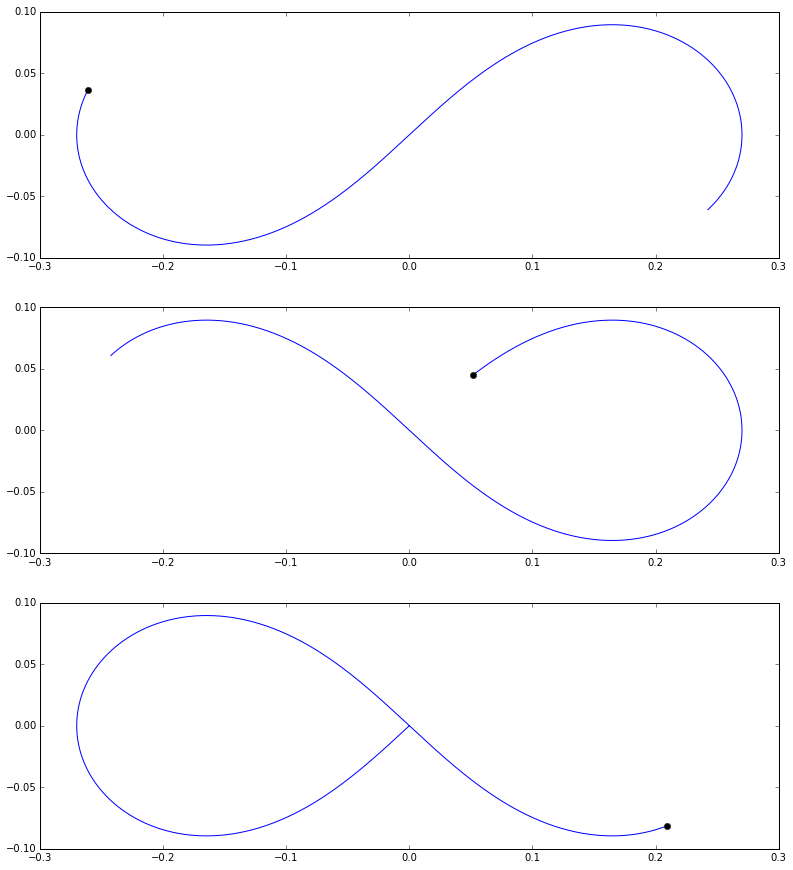

In [4]:
# Gráfica de las posiciones de los planetas para el Runge Kutta con media unidad de tiempo.
%matplotlib inline
x1 = history[:,1]
y1 = history[:,2]
x2 = history[:,3]
y2 = history[:,4]
x3 = history[:,5]
y3 = history[:,6]
plt.figure(figsize=(20,15))
plt.subplot(3,1,1,aspect = 'equal')
plt.plot(x1,y1)
plt.plot(x1[-1],y1[-1],'ko')
plt.subplot(3,1,2,aspect = 'equal')
plt.plot(x2,y2)
plt.plot(x2[-1],y2[-1],'ko')
plt.subplot(3,1,3,aspect = 'equal')
plt.plot(x3,y3)
plt.plot(x3[-1],y3[-1],'ko')
Y = np.array([r1_0[0], r1_0[1], r2_0[0], r2_0[1], r3_0[0], r3_0[1],
              v1_0[0], v1_0[1], v2_0[0], v2_0[1], v3_0[0], v3_0[1]]) # Arreglo inicial de posiciones y velocidades.

## b) Períodos de las órbitas.

In [5]:
Y = np.array([r1_0[0], r1_0[1], r2_0[0], r2_0[1], r3_0[0], r3_0[1],
              v1_0[0], v1_0[1], v2_0[0], v2_0[1], v3_0[0], v3_0[1]]) 

tmax = 1. # Se corre nuevamente el Runge Kutta teniendo en cuenta que todas las órbitas se cierran para este tmax.

t = 0. 

Deltat = float(format(tmax/numIter, '.5f')) 

history = np.array([[float(format(t, '.5f')),Y[0],Y[1],Y[2],Y[3],Y[4],
                     Y[5],Y[6],Y[7],Y[8],Y[9],Y[10],Y[11]]]) 
                                                             
for i in range(numIter): 
    chosenstep()         
    history = np.append(history,[[float(format(t, '.5f')),Y[0],Y[1],Y[2],
                                  Y[3],Y[4],Y[5],Y[6],Y[7],Y[8],Y[9],Y[10],Y[11]]],axis=0)

x1 = history[:,1]
y1 = history[:,2]

r1 = np.array([[x1[i],y1[i]] for i in range(len(x1))]) 
                                                       
r1 -= r1_0 

r1 = r1[1:] 
            

r1 = np.array([norm(r1[i]) for i in range(len(r1))]) # Se calcula la norma del vector desplazamiento en 
                                                     # cada instante de tiempo.
min_index = np.argmin(r1) # La posición del minimo del array anterior indica el regreso del planeta a su posición 
                          # inicial.
    
print(u"El período de las órbitas es: %.3f unidades de tiempo" %history[:,0][min_index+1])

El período de las órbitas es: 0.791 unidades de tiempo


## c) Animación para 3 cuerpos.

In [6]:
# Animación de las órbitas anteriores.
%matplotlib

# Inicialización de la figura de la animación con los límites observados de las gráficas anteriores.
fig=plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-0.3, 0.3), ylim=(-0.1, 0.1))
ax.grid(True) # Add grid
ax.set_aspect('equal')

completetrayectory = ax.plot(x1,y1,"--k",alpha=0.4) # Trayectoria punteada que siguen los planetas.
plt.title(u"Coreografía gravitacional de 3 cuerpos\n") # Título de la animación.

# Grafico las colas de las trayectorias.
trayectory1, = ax.plot([], [], '-', lw=2,label="Planeta 1")
trayectory2, = ax.plot([], [], '-', lw=2,label="Planeta 2")
trayectory3, = ax.plot([], [], '-', lw=2,label="Planeta 3")

# Grafico las posiciones actuales de los planetas.
planet1, = ax.plot([], [], 'ok', lw=2)
planet2, = ax.plot([], [], 'ok', lw=2)
planet3, = ax.plot([], [], 'ok', lw=2)

plt.legend(loc='best')

def animate(i):
    if( i<20 ):
        mini=0
    else:
        mini=i-20
    thisx1 = x1[mini:i]
    thisy1 = y1[mini:i]
    thisx2 = x2[mini:i]
    thisy2 = y2[mini:i]
    thisx3 = x3[mini:i]
    thisy3 = y3[mini:i]

    trayectory1.set_data(thisx1, thisy1)
    trayectory2.set_data(thisx2, thisy2)
    trayectory3.set_data(thisx3, thisy3)
    
    planet1.set_data([x1[i]],[y1[i]])
    planet2.set_data([x2[i]],[y2[i]])
    planet3.set_data([x3[i]],[y3[i]]) # Actualización de las trayectorias y posiciones de los planetas.
    return trayectory1, trayectory2, trayectory3, planet1, planet2, planet3

ani = animation.FuncAnimation(fig, animate, np.arange(0,1000,10) ,
    interval=100, blit=False,repeat_delay=1000)

#Writer = animation.writers['ffmpeg']
#writer = Writer(fps=20, metadata=dict(artist='Me'), bitrate=1800)
#ani.save(u'Coreografía 3 cuerpos.mp4', writer=writer)

plt.show()

Using matplotlib backend: Qt4Agg


# 2) Problema de 4 cuerpos.

## a) Parámetro óptimo a.

In [7]:
# Nueva función para el problema de 4 cuerpos. Es igual que la función previamente definida con un planeta más.
def f(Y):
    r1 = np.array([Y[0],Y[1]])
    r2 = np.array([Y[2],Y[3]])
    r3 = np.array([Y[4],Y[5]])
    r4 = np.array([Y[6],Y[7]])
    r12 = r2 - r1 
    r13 = r3 - r1
    r14 = r4 - r1
    r23 = r3 - r2
    r24 = r4 - r2
    r34 = r4 - r3
    norm_r12 = norm(r12) 
    norm_r13 = norm(r13)
    norm_r14 = norm(r14)
    norm_r23 = norm(r23)
    norm_r24 = norm(r24)
    norm_r34 = norm(r34)
    return np.array([Y[8], Y[9], Y[10], Y[11], Y[12], Y[13], Y[14], Y[15], 
                      m*r12[0]/(norm_r12**3) + m*r13[0]/(norm_r13**3) + m*r14[0]/(norm_r14**3),
                      m*r12[1]/(norm_r12**3) + m*r13[1]/(norm_r13**3) + m*r14[1]/(norm_r14**3),
                     -m*r12[0]/(norm_r12**3) + m*r23[0]/(norm_r23**3) + m*r24[0]/(norm_r24**3), 
                     -m*r12[1]/(norm_r12**3) + m*r23[1]/(norm_r23**3) + m*r24[1]/(norm_r24**3),
                     -m*r13[0]/(norm_r13**3) - m*r23[0]/(norm_r23**3) + m*r34[0]/(norm_r34**3), 
                     -m*r13[1]/(norm_r13**3) - m*r23[1]/(norm_r23**3) + m*r34[1]/(norm_r34**3),
                     -m*r14[0]/(norm_r14**3) - m*r24[0]/(norm_r24**3) - m*r34[0]/(norm_r34**3), 
                     -m*r14[1]/(norm_r14**3) - m*r24[1]/(norm_r24**3) - m*r34[1]/(norm_r34**3)])

# Nuevos parámetros para el problema.
numIter = 1000
a = np.linspace(0.760145145145, 0.760155155155, 100) # Se inicia con un array para el parámetro desconocido. 
                                                     # Los valores entre los cuales se busca el array fueron 
                                                     # determinados con el mismo método paulatinamente, 
                                                     # disminuyendo en cada ocasión la mínima ditancia querida entre
                                                     # la posición inicial y final de el planeta 4.
                                                     # Se escogió este planeta porque se observó que su trayectoria 
                                                     # era la más estable de las cuatro y la que menos se disparaba 
                                                     # con respecto a cambios de el parámetro a.
optimus_a = 0.
r1_0 = np.array([0.384277200514,0.])
r2_0 = np.array([-0.0156823005697,-0.13966430504])
r3_0 = np.array([-0.352912599375,0.])
r4_0 = np.array([-0.0156823005697,0.13966430504])
v2_0 = np.array([-2.01155925929,-1.19817066623])
v3_0 = np.array([0.,1.63619158614])
v4_0 = np.array([2.01155925929,-1.19817066623])

tmax = 1. # Tiempo dado para que se cierren las órbitas (Período orbital).

t = 0.

Deltat = float(format(tmax/numIter, '.5f'))

# Para cada elemento del array de posibles valores de a se soluciona la ecuación diferencial con Runge Kutta y 
# se examina si la distancia entre la posición inicial y final es lo suficientemente pequeña, es decir, si la 
# órbita es cerrada o no.
for i in range(len(a)):
    v1_0 = np.array([0.,a[i]])

    Y = np.array([r1_0[0], r1_0[1], r2_0[0], r2_0[1], r3_0[0], r3_0[1], r4_0[0], r4_0[1],
                  v1_0[0], v1_0[1], v2_0[0], v2_0[1], v3_0[0], v3_0[1], v4_0[0], v4_0[1]])

    history = np.array([[float(format(t, '.5f')), Y[0], Y[1], Y[2], Y[3], Y[4], Y[5], Y[6],
                         Y[7], Y[8], Y[9], Y[10], Y[11], Y[12], Y[13], Y[14], Y[15]]])

    for y in range(numIter):
        chosenstep()
        history = np.append(history,[[float(format(t, '.5f')),Y[0],Y[1],Y[2],Y[3],Y[4],Y[5],
                                      Y[6],Y[7],Y[8],Y[9],Y[10],Y[11],Y[12],Y[13],Y[14],Y[15]]],axis=0)
    x4 = history[:,7][-1] - r4_0[0]
    y4 = history[:,8][-1] - r4_0[1] 
    dist = np.sqrt((x4)**2 + (y4)**2)
    if dist<0.0000005:
        optimus_a = a[i]      
print "El a óptimo es: " + str(optimus_a)

El a óptimo es: 0.760149796261


In [8]:
# Se vuelve a correr el Runge Kutta con el parámetro óptimo con el fin de graficar las trayectorias.
v1_0 = np.array([0.,optimus_a])
Y = np.array([r1_0[0], r1_0[1], r2_0[0], r2_0[1], r3_0[0], r3_0[1], r4_0[0], r4_0[1],
              v1_0[0], v1_0[1], v2_0[0], v2_0[1], v3_0[0], v3_0[1], v4_0[0], v4_0[1]])

tmax = 1.

t = 0.

Deltat = float(format(tmax/numIter, '.5f'))

history = np.array([[float(format(t, '.5f')),Y[0],Y[1],Y[2],Y[3],Y[4],Y[5],Y[6],Y[7],
                     Y[8],Y[9],Y[10],Y[11],Y[12],Y[13],Y[14],Y[15]]])

for i in range(numIter):
    chosenstep()
    history = np.append(history,[[float(format(t, '.5f')),Y[0],Y[1],Y[2],Y[3],Y[4],Y[5],
                                  Y[6],Y[7],Y[8],Y[9],Y[10],Y[11],Y[12],Y[13],Y[14],Y[15]]],axis=0)

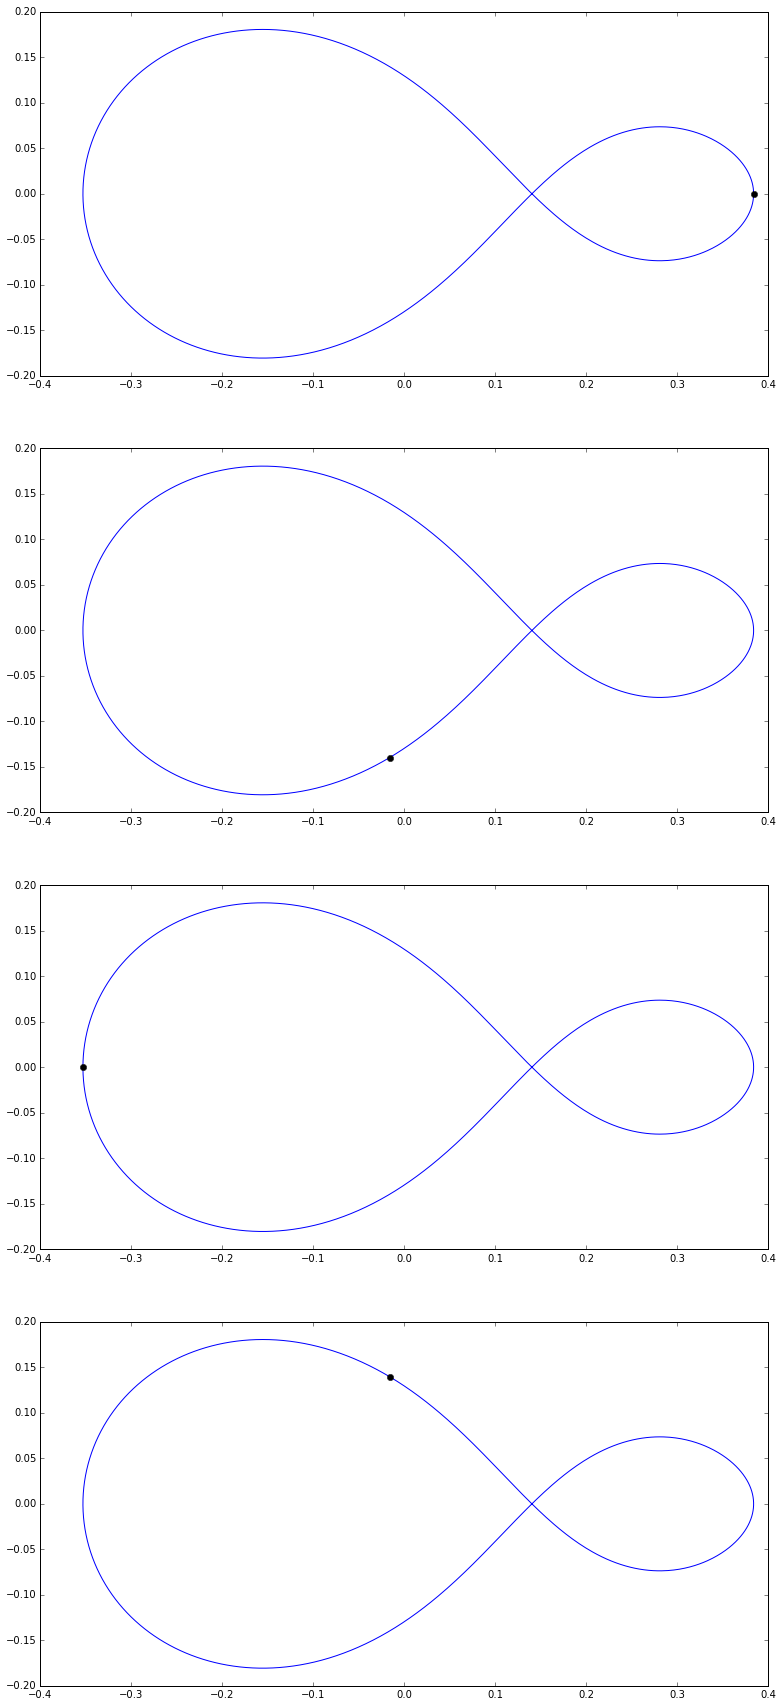

In [9]:
# Gráfica de las trayectorias de los planetas.
%matplotlib inline
x1 = history[:,1]
y1 = history[:,2]
x2 = history[:,3]
y2 = history[:,4]
x3 = history[:,5]
y3 = history[:,6]
x4 = history[:,7]
y4 = history[:,8]
plt.figure(figsize=(40,30))
plt.subplot(4,1,1,aspect = 'equal')
plt.plot(x1,y1)
plt.plot(x1[-1],y1[-1],'ko')
plt.subplot(4,1,2,aspect = 'equal')
plt.plot(x2,y2)
plt.plot(x2[-1],y2[-1],'ko')
plt.subplot(4,1,3,aspect = 'equal')
plt.plot(x3,y3)
plt.plot(x3[-1],y3[-1],'ko')
plt.subplot(4,1,4,aspect = 'equal')
plt.plot(x4,y4)
plt.plot(x4[-1],y4[-1],'ko')
plt.show()

## b) Animación de las óbitas de los 4 planetas.

In [10]:
# Animacion de las órbitas de los planetas.
%matplotlib

time = history[:,0]

fig=plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-0.4, 0.4), ylim=(-0.2, 0.2))
ax.grid(True) # Add grid
ax.set_aspect('equal')

completetrayectory = ax.plot(x1,y1,"--k",alpha=0.4)
plt.title(u"Coreografía gravitacional de 4 cuerpos\n")

# The following three plot the trails
trayectory1, = ax.plot([], [], '-', lw=2,label="Planeta 1")
trayectory2, = ax.plot([], [], '-', lw=2,label="Planeta 2")
trayectory3, = ax.plot([], [], '-', lw=2,label="Planeta 3")
trayectory4, = ax.plot([], [], '-', lw=2,label="Planeta 4")

# The following three plot the current positions
planet1, = ax.plot([], [], 'ok', lw=2)
planet2, = ax.plot([], [], 'ok', lw=2)
planet3, = ax.plot([], [], 'ok', lw=2)
planet4, = ax.plot([], [], 'ok', lw=2)

plt.legend(loc='best')

def animate(i):
    if( i<20 ):
        mini=0
    else:
        mini=i-20
    thisx1 = x1[mini:i]
    thisy1 = y1[mini:i]
    thisx2 = x2[mini:i]
    thisy2 = y2[mini:i]
    thisx3 = x3[mini:i]
    thisy3 = y3[mini:i]
    thisx4 = x4[mini:i]
    thisy4 = y4[mini:i]

    trayectory1.set_data(thisx1, thisy1)
    trayectory2.set_data(thisx2, thisy2)
    trayectory3.set_data(thisx3, thisy3)
    trayectory4.set_data(thisx4, thisy4)
    
    planet1.set_data([x1[i]],[y1[i]])
    planet2.set_data([x2[i]],[y2[i]])
    planet3.set_data([x3[i]],[y3[i]])
    planet4.set_data([x4[i]],[y4[i]])
    return trayectory1, trayectory2, trayectory3, trayectory4, planet1, planet2, planet3, planet4


ani = animation.FuncAnimation(fig, animate, np.arange(0,1000,10) ,
    interval=100, blit=False,repeat_delay=1000)

#Writer = animation.writers['ffmpeg']
#writer = Writer(fps=20, metadata=dict(artist='Me'), bitrate=1800)
#ani.save(u'Coreografía 4 cuerpos.mp4', writer=writer)

plt.show()

Using matplotlib backend: Qt4Agg


## c) Gráfica de las energías.

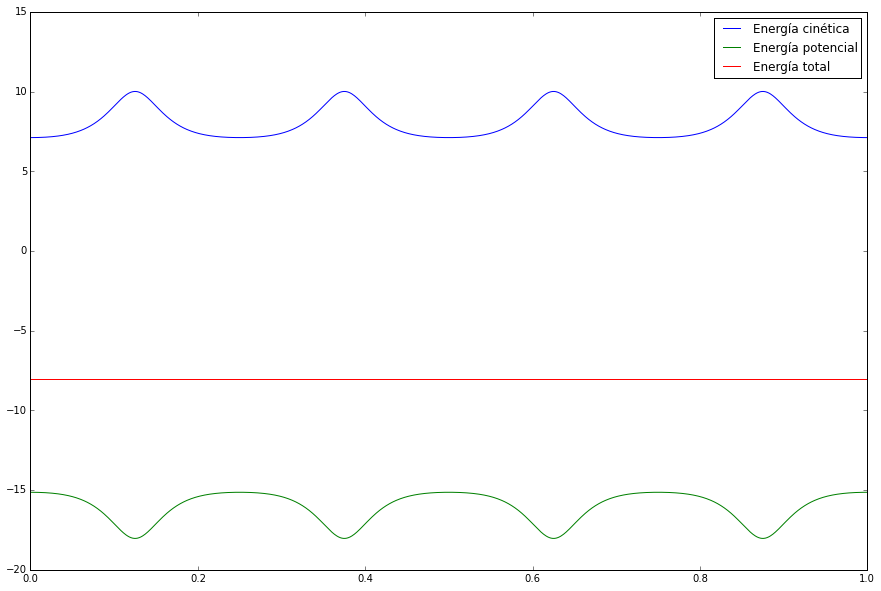

In [11]:
# Gráfica de la energía potencial, la energía cinética y la energía total del sistema de 4 planetas.
%matplotlib inline
# Arreglos de las posiciones de cada uno de los planetas en cada instante.
r1 = np.array([[x1[i],y1[i]] for i in range(len(x1))])
r2 = np.array([[x2[i],y2[i]] for i in range(len(x2))])
r3 = np.array([[x3[i],y3[i]] for i in range(len(x3))])
r4 = np.array([[x4[i],y4[i]] for i in range(len(x4))])
# Posiciones relativas de los planetas.
r12 = r2-r1
r13 = r3-r1
r14 = r4-r1
r23 = r3-r2
r24 = r4-r2
r34 = r4-r3
# Norma de los vectores anteriores.
r12 = np.array([norm(r12[i]) for i in range(len(r12))])
r13 = np.array([norm(r13[i]) for i in range(len(r13))])
r14 = np.array([norm(r14[i]) for i in range(len(r14))])
r23 = np.array([norm(r23[i]) for i in range(len(r23))])
r24 = np.array([norm(r24[i]) for i in range(len(r24))])
r34 = np.array([norm(r34[i]) for i in range(len(r34))])
# Velocidades de cada uno de los planetas en cada instante.
v1_square = history[:,9]**2 + history[:,10]**2
v2_square = history[:,11]**2 + history[:,12]**2
v3_square = history[:,13]**2 + history[:,14]**2
v4_square = history[:,15]**2 + history[:,16]**2

kinetic_energy = v1_square/2. + v2_square/2. + v3_square/2. + v4_square/2. # Energía cinética, que va como el cuadrado de 
                                                                           # la velocidad.
    
potential_energy = -1./r12 -1./r13 -1./r14 -1./r23 -1./r24 -1./r34 # Energía potencial gravitacional,
                                                                   # que sabemos que va como  el inverso
                                                                   # de las distancia.
total_energy = kinetic_energy + potential_energy # Energía total, que es la suma de la potencial y la cinética.

plt.figure(figsize=(15,10))
plt.plot(time,kinetic_energy,label=u'Energía cinética')
plt.plot(time,potential_energy,label=u'Energía potencial')
plt.plot(time,total_energy,label=u'Energía total')
plt.legend()
plt.show()